In [1]:
! pip install requests
! pip install beautifulsoup4
! pip install lxml
! pip install pandas
! pip install sklearn
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install urllib
! pip install time
! pip install selenium
! pip install sklearn


  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1317 sha256=0b1cd81cf9188a2e451d784eef287f7c8985a94cdade2a92dcc1dee36612755d
  Stored in directory: c:\users\assay\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib
ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [3]:
from urllib.request import urlopen
import pandas as pd
import lxml
import time
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import lxml
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
topic = input("검색하고자 하는 기술을 입력하세요 : ")
url = "https://github.com/topics/{}?o=desc&s=stars".format(topic)
# 내 컴퓨터의 User_Agent
res= requests.get(url)
res.raise_for_status()
soup=BeautifulSoup(res.text,"lxml")
soup

browser = webdriver.Chrome("./chromedriver")
browser.get(url)
soup = BeautifulSoup(browser.page_source,'lxml')
# Load more 을 몇번 누를것인지??
# 임의로 100번을 했지만 star수가 예를들어 x개 이상일때까지 Load_more버튼을 누르는 식으로도 가능
Load_more_times = 100
for _ in range(Load_more_times):
    prev = len(soup.find_all("article",attrs={"class":"border rounded color-shadow-small color-bg-subtle my-4"}))
    print(prev,"개 load 완료.")
    try:
        browser.find_element_by_xpath("//*[@id=\"js-pjax-container\"]/div[2]/div[2]/div/div[1]/form/button").click()
    except:
        print("Load 완료")
        break
    while 1:
        soup = BeautifulSoup(browser.page_source,'lxml')
        if prev < len(soup.find_all("article",attrs={"class":"border rounded color-shadow-small color-bg-subtle my-4"})):
            prev = len(soup.find_all("article",attrs={"class":"border rounded color-shadow-small color-bg-subtle my-4"}))
            break
    
# Topic들을 Crawling후 나열 
soup = BeautifulSoup(browser.page_source,'lxml')
topics = soup.find_all("h3",attrs={"class":"f3 color-fg-muted text-normal lh-condensed"})
topic_ads = []
for i in topics:
    topic_ad = "".join(i.get_text().strip().replace("\n","").split()) 
    topic_ads.append(topic_ad)

검색하고자 하는 기술을 입력하세요 : deep learning
30 개 load 완료.
60 개 load 완료.
90 개 load 완료.


In [39]:
# 저장소들을 Crawling후 나열 
soup = BeautifulSoup(browser.page_source,'lxml')
topics = soup.find_all("h3",attrs={"class":"f3 color-fg-muted text-normal lh-condensed"})
topic_ads = []
for i in topics:
    topic_ad = "".join(i.get_text().strip().replace("\n","").split()) 
    topic_ads.append(topic_ad)
topic_ads

['tensorflow/tensorflow',
 'opencv/opencv',
 'keras-team/keras',
 'pytorch/pytorch',
 'aymericdamien/TensorFlow-Examples',
 'deepfakes/faceswap',
 'Avik-Jain/100-Days-Of-ML-Code',
 'BVLC/caffe',
 'CorentinJ/Real-Time-Voice-Cloning',
 'floodsung/Deep-Learning-Papers-Reading-Roadmap',
 'iperov/DeepFaceLab',
 'GokuMohandas/MadeWithML',
 'd2l-ai/d2l-zh',
 'ZuzooVn/machine-learning-for-software-engineers',
 'naptha/tesseract.js',
 'ageron/handson-ml',
 'terryum/awesome-deep-learning-papers',
 'CMU-Perceptual-Computing-Lab/openpose',
 'yunjey/pytorch-tutorial',
 'donnemartin/data-science-ipython-notebooks',
 'explosion/spaCy',
 'fastai/fastai',
 'eriklindernoren/ML-From-Scratch',
 'ultralytics/yolov5',
 'mozilla/DeepSpeech',
 'ray-project/ray',
 'deezer/spleeter',
 'ChristosChristofidis/awesome-deep-learning',
 'AlexeyAB/darknet',
 'eugeneyan/applied-ml',
 'photoprism/photoprism',
 'academic/awesome-datascience',
 'microsoft/CNTK',
 'PaddlePaddle/Paddle',
 'lutzroeder/netron',
 'MLEveryday/1

In [42]:
# topics 이 들어갈 dic
topics_dic = {}
topics_list= []
# 한번의 loop마다 주소생성,soup생성,Crawling을 하기때문에 코드 실행시간이 매우 오래걸림
for idx,ad in enumerate(topic_ads):
    print("{}% 완료".format(round((idx*100/len(topic_ads)+1))))
    url_topic = "https://github.com/" + ad
    res_topic = requests.get(url_topic)

    soup_topic = BeautifulSoup(res_topic.text,"lxml")
    
    topic = soup_topic.find("div",attrs={"class":"BorderGrid-cell"}).find_all("a",attrs={"class":"topic-tag topic-tag-link"})
    project_topics=[i.get_text().replace("\n","").replace("\t","").strip() for i in topic]
    topics_list.append([topic_ads[idx],project_topics])
    for t in project_topics:
        if t in topics_dic:
            topics_dic[t] += 1
        else:
            topics_dic[t] = 1
topics_dic= sorted(topics_dic.items(), key=lambda x: x[1], reverse=True)

df_keyword = pd.DataFrame(topics_list,columns=['project_name','topic_keyword'])
df_keyword.to_excel("keyword({}).xlsx".format(topic))
print("keyword({}).xlsx".format(topic),"저장완료.")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

project_name  \
0                             tensorflow/tensorflow   
1                                     opencv/opencv   
2                                  keras-team/keras   
3                                   pytorch/pytorch   
4                 aymericdamien/TensorFlow-Examples   
5                                deepfakes/faceswap   
6                     Avik-Jain/100-Days-Of-ML-Code   
7                                        BVLC/caffe   
8                 CorentinJ/Real-Time-Voice-Cloning   
9    floodsung/Deep-Learning-Papers-Reading-Roadmap   
10                               iperov/DeepFaceLab   
11                          GokuMohandas/MadeWithML   
12                                    d2l-ai/d2l-zh   
13  ZuzooVn/machine-learning-for-software-engineers   
14                              naptha/tesseract.js   
15                                ageron/handson-ml   
16             terryum/awesome-deep-learning-papers   
17            CMU-Perceptual-Computing-Lab/openpose   
18                          yunjey/pytorch-tutorial   
19       donnemartin/data-science-ipython-notebooks   

                                        topic_keyword  
0   [python, machine-learning, deep-neural-network...  
1   [opencv, c-plus-plus, computer-vision, deep-le...  
2   [python, data-science, machine-learning, deep-...  
3   [python, machine-learning, deep-learning, neur...  
4   [python, machine-learning, tutorial, deep-lear...  
5   [machine-learning, deep-neural-networks, deep-...  
6   [python, machine-learning, tutorial, deep-lear...  
7           [machine-learning, deep-learning, vision]  
8   [python, deep-learning, tensorflow, pytorch, t...  
9                                     [deep-learning]  
10  [deep-neural-networks, deep-learning, faceswap...  
11  [python, data-science, machine-learning, natur...  
12  [python, machine-learning, natural-language-pr...  
13  [machine-learning, deep-learning, machine-lear...  
14  [javascript, ocr, deep-learning, webassembly, ...  
15  [python, machine-learning, deep-learning, neur...  
16  [machine-learning, deep-neural-networks, deep-...  
17  [opencv, machine-learning, real-time, caffe, c...  
18  [deep-learning, pytorch, neural-networks, pyto...  
19  [python, aws, data-science, machine-learning, ...

### 해당 ipynb 경로에 (토픽 이름).xlsx 파일 형태로 저장

In [45]:
# 비슷한 토픽끼리는 하나의 칼럼이 될 수 있도록 일일히 비슷한 토픽끼리 묶는 작업을 하였음
target = ['machinelearning','package','zsh','zerossl','youtube','xcode','x64','wysiwyg','workflow','windows','weixin','wechat','web','vue',
         'vpn','vision','vim','vedio','version','util','ui','typescript','twitter','touch','test','terminal','tensorflow',
         'telegram','task','system','swift','swagger','svg','style','static','state','ssh','sql','spring','sort','software',
         'snippets','server','security','search','scikit-learn','rfc','rest','redis','react','queue','pytorch','python','protoc','progress',
         'programming','posix','php','performance','openwrt','note','nodejs','neural','nlp','monitoring','microservice','material','macos','linux',
          'leetcode','language','kotlin','json','javascript','ios','interview','http','html','headless','graphql','git','frontend','font','flutter',
          'firefox','file','face-swap','docker','distributed','design','deep-learning','data','css','cloud','chrome','automation','api','angular',
          'android','algorithm','pull-request', 'public','pixi','open-source','object-detection','multi-platform','mini','low-code','localstorage','loading',
          'kubernetes','koa','image','humans','game','free','detection','drag','document','devops','dashboard','crypto','cpp','continuous-delivery','command','cheatsheet',
          'certificate','business','build','bootstrap','awesome','audio','apple','apache','ansi','animation','alibaba','admin','activejob'
         ]



string_list = [['machinelearning-python','ml','machine-translation','machine-learning-from-scratch','machine-learning-algorithms','machine-learning'],['packages','package-manager','packaging'],['zsh-theme','zsh-prompt','zsh-configuration','zsh-autosuggestions'],['zero-copy','zero-configuration'],['youtube-live'],['xcode10'],['x86-64','x86'],['wysiwyg-editor'],
               ['workflow-automation','works-with-clojurescript','works-with-codespaces','works-with-construct','works-with-elm','works-with-flutter','works-with-gatsby','works-with-mint','works-with-phaser','works-with-react','works-with-reason','works-with-svelte','works-with-vue','works-with-yew'],
               ['windowing','windows-10','windows-console','windows-terminal','windowscontainers'],['weixin-plugin'],['wechat-macos','wechat-mini-program','wechat-plugin','wechat-weapp'],
               ['webxr','webworkers','webview','webtorrent','webstorm','websql','websockets','websocket-server','websocket-compression','websocket-client','websocket','website','webservices','webscraping','webrtc','webpack5','webpack4','webpack2','webpack','webp','webm','webgpu','webgl2','webgl','webframework','webfont','webfinger','webdriver','webdevelopment','webdav','webcomponents','webbrowser','webaudio','webassembly','webapp','webapi','web-terminal','web-server','web-performance','web-framework','web-development','web-components','web-clipper','web-audio','web-application-framework','web-application','web-app','web','sdwebimage','react-native-web','node-webkit','mobile-web','ipfs-web'],
               ['vuex','vuetifyjs','vuetify','vuepress','vuejs3','vuejs2','vuejs','vue3','vue2','vue-router','vue-material','vue-components','vue-component','vue-cli','vue-admin','ant-design-vue'],
               ['vpn-server','vpn-client'],['visual-studio','visualizer','visualizations','visualization','visual-studio-code-theme','visual-studio-code-extension','visual-studio-code','visual-studio','data-visualization'],
               ['vimrc','vimeo','vim-plugins','vim-plugin','vim-distribution','vim-configuration','vim'],['videojs','videocache','video-recording','video-player','video-conferencing','video-communication','video','scalable-video-conferences','html5-video','explanatory-math-videos','deep-video','3b1b-videos'],
               ['versioning','version-manager'],['utils','utility-classes','utilities'],['ui-library','ui-kit','ui-design','ui-components','redis-gui-client','gui-framework','gui-app'],
               ['typescript-playground','typescript-framework','typescript-definitions','typescript'],['twitter-streaming','twitter-cards','twitter','tweet'],
               ['touchscreen','touch-events','touch'],['unit-testing','tests','testing-tools','testing','test-suite','test-runners','test-runner','test-framework','test-automation','performance-testing','pentesting-windows','pentesting','pentesters','pentest','penetration-testing','painless-javascript-testing','load-testing','javascript-tests','interview-test','end-to-end-testing','e2e-tests','e2e-testing','api-testing','api-test'],
               ['windows-terminal','web-terminal','terminals','terminal-themes','terminal-schemes','terminal-emulators','terminal-color','terminal','osx-terminal-themes','lxterminal'],
               ['tensorflow-lite','tensorflow','tensor'],['telegram-solution','telegram-desktop'],['task-scheduler','task-runner','task-manager'],
               ['systems-science','systems','system-design','system','recommendedsystem','operating-system','management-system','fuse-filesystem','filesystem','embedded-systems','distributed-systems','design-systems','design-system','database-systems','content-management-system','build-system'],
               ['swiftyjson','swiftui','swiftpm','swift4-2','swift-programming','swift-package-manager','swift-library','swift-language','swift-framework','swift-extensions','swift','server-side-swift','rxswift','reactiveswift','openstack-swift','json-parsing-swift','ios-swift','awesome-swift','apple-swift'],
               ['swagger2','swagger-ui','swagger-js','swagger-api'],['svgo','svg-sprites','svg-path','svg-icons'],['stylesheets','stylesheet-language','styleguide','styled-components','style-linter','style-guide'],
               ['static-site-generator','static-code-analysis','static-analysis'],['statechart','state-tree','state-management','state-machine'],
               ['ssh-tunnel','ssh-server','ssh-agent'],['websql','sqlserver','sqlmap','sqlite','sql-server','sql-injection','sql-editor','sql','spark-sql','postgresql','nosql','mysql-compatibility','mysql','mssql','microsoft-sql-server'],
               ['springs','springmvc','springcloud-config','springcloud','springbootadmin','springboot-shiro','springboot','spring-session','spring-security','spring-physics','spring-framework','spring-data-jpa','spring-cloud-core','spring-cloud-alibaba','spring-cloud','spring-cache','spring-boot-upload-file','spring-boot-mongodb','spring-boot-mail','spring-boot-learning','spring-boot-examples','spring-boot-demo','spring-boot-2','spring-boot','spring','react-spring'],
               ['sorts','sorting-algorithms','sortable'],['software-engineering','software-engineer','software-development','software-analysis'],
               ['snippets-library','snippets-collection','snippets'],['websocket-server','web-server','vpn-server','ssh-server','sqlserver','sql-server','serverless-functions','serverless-framework','serverless-architectures','serverless','server-side-swift','server-side-rendering','server-rendering','server','parse-server','observer','microsoft-sql-server','jumpserver','http-server','graphql-server','dns-server','dhcp-server','dev-server','api-server'],
               ['spring-security','security-researchers','security-checklist','security-book','security','macos-security','macbook-security','docker-security','application-security'],
               ['site-search','silver-searcher','security-researchers','searches','search-in-text','search-engines','search-engine','search','research','jobsearch','jobs-search','hyperparameter-search','entreprise-search','elasticsearch','distributed-search-engine'],
               ['scikit-learn-python','scikit-learn'],['rfc-8259','rfc-7159','rfc-7049','rfc-6902','rfc-6901','rfc-6455'],['restful-api','restful','rest-api','rest','postgrest','api-rest','admin-on-rest'],
               ['redis-gui-client','redis-gui','redis-cluster','redis-client'],['works-with-react','reactjs','reactivex','reactiveui','reactiveswift','reactivecocoa','reactive-streams','reactive-programming','reactive','react16','react-tutorial','react-spring','react-router','react-navigation','react-native-web','react-native','react-interview-questions','react-hooks','react-components','react-component','react-boilerplate','react-apps','react-admin'],
               ['sqs-queue','queued-jobs','queue-workers','queue-tasks','queue','message-queue'],['pytorch-tutorial','pytorch-transformers'],['scikit-learn-python','python3','python-types','python-resources','python-requests','python-library','python-interview-questions','python-framework','python-cheatsheet','python-3','python','progress-bar-python'],
               ['protocol-compiler','protocol-buffers','protocol','protoc','ipfs-protocol','homekit-accessory-protocol','acme-protocol'],['progressmeter','progressbar','progress-bar-python','progress-bar'],['swift-programming','reactive-programming','programming-tutorial','programming-ligatures','programming-language','programming-interviews','programming-blogs','programming','programmer','javascript-programming','functional-programming','dynamic-programming-algorithm','dynamic-programming','concurrent-programming','competitive-programming'],
               ['posix-sh','posix-compliant-flags','posix-compliant'],['phpunit','phpstorm','phpmailer','php8','php7','php-library','php-installation','php-framework','php-applications','php','modern-php','designpatternsphp'],
               ['web-performance','performance-testing','performance-metrics','performance-analysis','performance','high-performance','best-performance'],
               ['openwrt-zh-cn','openwrt-shadowsocksr-libev-full','openwrt-package','openwrt-feed'],['notes','notebooks','notebook','note','jupyter-notebook','evernote'],['nodemon','nodejs-framework','nodejs-development','nodejs','node-webkit','node-module','node-js','node-framework','node'],
               ['neural-networks','neural-network','neural-nets','deep-neural-networks'],['natural-language-understanding','natural-language-processing','natural-language-generation','nlp-tasks','nlp-library'],['monitoring','monitor','error-monitoring','docker-monitoring'],
               ['polyglot-microservices','microservices-architecture','microservices'],['vue-material','training-materials','material-ui','material-theme','material-design-lite','material-design-for-bootstrap','material-design','material-components','material','bootstrap-material','angularjs-material'],
               ['wechat-macos','macosx','macos-setup','macos-security','macos-application'],['ubuntu-linux','linux-resource','linux-kernel','linux-insides','linux-desktop','linux-command','linux-app'],
               ['leetcode-solutions','leetcode-questions','leetcode-java','leetcode-golang','leetcode-go','leetcode-c'],['swift-language','stylesheet-language','ruby-language','programming-language','natural-language-understanding','natural-language-processing','natural-language-generation','multi-language','language-models','language-model','language-grammars','language-client','language','julia-language','esoteric-language'],
               ['kotlin-library','kotlin-android'],['ubjson','swiftyjson','json-serializer','json-serialization','json-schema','json-pointer','json-patch','json-parsing-swift','json-parsing-library','json-parser','json-merge-patch','json-diff','json','fastjson'],['painless-javascript-testing','javascript-tests','javascript-programming','javascript-motion-engine','javascript-modules','javascript-library','javascript-interview-questions','javascript-framework','javascript-engines','javascript-engine','javascript-compiler','javascript-closures','javascript-best-practices','javascript-applications','javascript-algorithms','javascript','es6-javascript','js-questions','js-ipfs','js'],
               ['ios-transition','ios-swift','ios-libraries','ios-lib','ios-framework','ios-animation'],['technical-coding-interview','react-interview-questions','rails-interview','python-interview-questions','programming-interviews','javascript-interview-questions','interviews','interviewing','interview-test','interview-questions','interview-preparation','interview-prep','interview-practice','interview','frontend-interview','front-end-interview','fe-interview','coding-interviews','coding-interview','angularjs-interview-questions','android-interview-questions'],
               ['httpurlresponse','https','httpie','httpclient','http2','http-server','http-proxy','http-client','http','automatic-https'],['htmlparser2','htmlparser','html5-video','html5-games','html5-game-development','html5-charts','html5-canvas','html5-boilerplate','html5-audio','html5','html-template','html-questions'],['headless-cms','headless-chrome','headless-browser'],
               ['graphql-server','graphql-relay','graphql-js','graphql-client','graphql-api','graphql','apollographql'],['hellogithub','gitops','gitlab','gitignore','github-pages','github-gist','github-api-v4','github-api','github-actions','github','gitea','gitbook','git'],['frontend-roadmap','frontend-interview','frontend-framework','frontend-development','frontend','front-end-interview','front-end-development','front-end-developer-tool','front-end'],
               ['webfont','variable-fonts','ttf-fonts','patched-fonts','opentype-fonts','iconic-fonts','icon-font','fonts','fontawesome','font-awesome'],['works-with-flutter','flutter-plugins','flutter-plugin','flutter-examples','flutter-doc','flutter-demo','flutter-apps'],['firefox-extension','firefox-addon'],['filesystem','files','file-uploads','file-uploader','file-upload','file-storage','file-sharing','file-manager','file-management'],
               ['openfaceswap','faceswap','face-swap','face-recognition','face-images','face-detection','deepfacelab','deepface','deep-face-swap'],['dockerfile','docker-ui','docker-swarm','docker-security','docker-registry','docker-monitoring','docker-machine','docker-image','docker-environment','docker-deployment','docker-container','docker-composer','docker-compose','docker-api'],['distributed-transactions','distributed-transaction','distributed-training','distributed-tracing','distributed-systems','distributed-search-engine','distributed-messaging','distributed-locks','distributed-database','distributed-configuration','distributed'],
               ['ui-design','system-design','material-design-lite','material-design-for-bootstrap','material-design','designpatternsphp','design-tools','design-systems','design-system','design-patterns-for-humans','design-patterns','design-pattern','design','api-design','ant-design-vue','ant-design'],['deepspeech','deeplearning','deepfakes','deepfacelab','deepface','deep-video','deep-reinforcement-learning','deep-neural-networks','deep-networks','deep-learning-tutorial','deep-learning','deep-io','deep-face-swap','creating-deepfakes'],['datasets','datamatrix','datamapper','datagrip','databricks','databases','database-systems','database-gui','database','data-viz','data-visualization','data-structures','data-structure','data-scientists','data-science','data-mining','data-mapper','data-flow','data-fetching','data-engineering','data-consistency','data-analytics','data-analysis'],
               ['functional-css','csse','css3-features','css3','css-tricks','css-reset','css-questions','css-in-js','css-framework','css-effects','css-animations'],['springcloud-config','springcloud','spring-cloud-core','spring-cloud-alibaba','spring-cloud','private-cloud','nextcloud','neteasecloud','google-cloud-storage','google-cloud-functions','cloudstorage','cloudnative','cloudmusic','cloudflare','cloud-storage','cloud-native','cloud-management','cloud-computing'],['headless-chrome','chrome-extensions','chrome-extension','chrome-devtools'],['zsh-autosuggestions','workflow-automation','test-automation','home-automation','build-automation','autosuggest','autopep8','autonomy','autonomous-vehicles','autonomous-driving','automl','automation','automatic-https','automatic-api','automated','autolayout','autograd','autocompletion','autocomplete','auto'],
               ['webscraping','webapi','swagger-api','strapi','scraping','restful-api','rest-api','public-apis','openapi3','openapi-specification','openapi','homekit-api','hapi','graphql-api','github-api-v4','github-api','fastapi','dom-apis','docker-api','automatic-api','apis','api-testing','api-test','api-server','api-rest','api-manager','api-management','api-gateway','api-documentation','api-design','api-client'],['angularjs-material','angularjs-interview-questions','angularjs','angular9','angular2','angular10','angular-dashboard-template','angular-components','angular-cli'],['mpandroidchart','kotlin-android','androidx','android-ui','android-studio','android-library','android-interview-questions','android-development','android-architecture'],
               ['sorting-algorithms','machine-learning-algorithms','javascript-algorithms','genetic-algorithm','dynamic-programming-algorithm','algorithms-implemented','algorithms-datastructures','algorithms-and-data-structures','algorithms','algorithm-competitions','algorithm-challenges'],
               ['pulltorefresh','pull-to-refresh','pull-request-review'],['public-trackers','public-tracker','public-key-pinning'],['pixiv','pixijs'],['openwrt','openvpn','openssl','opensource','openpose','opengl','opendata','opencv','openconnect','open-telemetry','open-source-project'],['objectstorage','objective-c-library','objective-c','object-storage','object-oriented'],['multithreading','multimedia','multiformats','multiboot','multi-platform','multi-person'],['miniprogram','minimalist','minikube','minify','minifier','minification','miniapp'],['low-code-plattform','low-code-development-platform','low-code'],
               ['localstack','localhost','localforage','local-development'],['loading','loaders','load-generator','load-balancer'],['kubernetes-ingress-controller','kubernetes-ingress'],['koa2','koa-middleware'],['imageloader','image-processor','image-processing','image-annotation'],['human-pose-estimation','human-pose','human-behavior-understanding','forhumans'],['puzzle-game','platform-game','not-the-game','games','gamedev','game-frameworks','game-engine','game-development','game-capture','game','facebook-instant-games'],['freeware-icon','freegate','freecodecamp','freebsd-vt','free-ssr','free-ss','free-software','free-fanqiang'],['object-detection','keypoint-detection','intrusion-detection','feature-detection'],['dragging','draggable','drag-drop','drag-and-drop'],['documentation-tool','documentation'],['devops-roadmap'],
                ['hystrix-dashboard','dashboards','dashboard-templates','dashboard','admin-dashboard'],['cryptography','cryptocurrency'],['cpplint','cppcon','cpp11','cpp-library'],['continuous-integration','continuous-deployment'],['subcommands','commandline','command-line-tool','command-line','command-cobra'],['cheatsheets'],
               ['certification','certificates','certificate-pinning'],['businessintelligence','business-intelligence','business-analytics'],['form-builder','buildpack','build-tools','build-tool','build-pipelines'],['secure-boot','multiboot','jeecgboot','jeecg-boot','bootstrap5','bootstrap4-theme','bootstrap4','bootstrap','bootable-usb'],['awesomeness','awesome-public-datasets','awesome-lists','awesome-list'],['audio-processing','audio-library'],['apple-watch','apple-tv','apple'],['apache-superset','apache-airflow'],['strip-ansi','ansible','ansi-escape-codes','ansi-colors','ansi'],['transition-animation','recyclerview-item-animation','animations','animation-library'],['alibaba-oss','alibaba-middleware'],['ngx-admin','ng2-admin','eladmin','adminpanel','admin-ui','admin-template','admin-panel','admin-dashboard'],
               ['activerecord','activemq','activejob','active-record']
                
              ]
def same_things(string):
    for idx,i in enumerate(string_list):
        if string in i:
            string = target[idx]    
    return string

In [47]:
topic_dic = {}
for idx,j in enumerate(df_keyword['topic_keyword']):
    for i in j:
        i = i.strip()
        i = same_things(i) # 위에서 만든 여러 토픽을 하나의 토픽으로 묶는 함수
        if len(i)==0:
            continue
        if i not in topic_dic:
            topic_dic[i] = 1
        else:
            topic_dic[i] +=1
result = []
topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)

topic_list = [i[0] for i in topic_dic]
# 위 과정들을 통해 얻은 토픽들을 통해 칼럼을 만듬
df_vector = pd.DataFrame(topic_list).transpose()

topic_dic_df = {}
for i in topic_list:
    topic_dic_df[i]=0
# 토픽들을 칼럼으로 가지는 각각의 패키지 별로 벡터를 만들고 모든 성분을 0으로 채움
df_vector = pd.DataFrame(result,index=df_keyword['project_name'],columns=topic_list).fillna(0)

# 각 패키지 별로 가지고있는 토픽을 +1 씩 하여 각 패키지의 벡터를 생성함
for idx,topics in enumerate(df_keyword['topic_keyword']):
    for topic in topics:
        if topic in topic_list:
            topic = same_things(topic)
            df_vector.loc[df_keyword['project_name'].iloc[idx],topic] += 1
df_vector.to_excel("keyword({})_vectors.xlsx".format(topic),index=False)
print("keyword({})_vectors.xlsx".format(topic),"저장완료.\n")


keyword(model-compression)_vectors.xlsx 저장완료.



## K-Means 클러스터링

K-means의 Cluster 수 : 10
********** deep learning K-Means 클러스터링 시작 **********


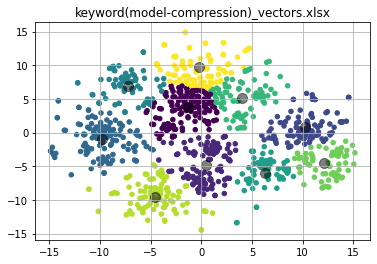

   num                                           clusters  cluster_num  \
0    0  [BVLC/caffe, floodsung/Deep-Learning-Papers-Re...          164   
1    1  [pytorch/pytorch, Avik-Jain/100-Days-Of-ML-Cod...          112   
2    2  [mozilla/DeepSpeech, photoprism/photoprism, da...          108   
3    3  [opencv/opencv, d2l-ai/d2l-zh, CMU-Perceptual-...          131   
4    4  [ZuzooVn/machine-learning-for-software-enginee...           79   
5    5  [tensorflow/tensorflow, keras-team/keras, ayme...           71   
6    6  [emilwallner/Screenshot-to-code, afshinea/stan...           88   
7    7  [donnemartin/data-science-ipython-notebooks, l...           72   
8    8  [yunjey/pytorch-tutorial, ultralytics/yolov5, ...          109   
9    9  [deepfakes/faceswap, iperov/DeepFaceLab, napth...           86   

                                       top_15_topics  
0  [(deep-learning, 180), (machinelearning, 93), ...  
1  [(deep-learning, 118), (python, 116), (machine...  
2  [(deep-learning, 

In [50]:
n_clusters = int(input("K-means의 Cluster 수 : "))
print("{} {} K-Means 클러스터링 시작 {}".format("*"*10,search_topic,"*"*10))
excel_name = "keyword({})_vectors.xlsx".format(topic)
df_topic = df_keyword
df_vector = pd.read_excel(excel_name)
m = TSNE(learning_rate = 50)
tsne_features = m.fit_transform(pd.DataFrame(df_vector))
df = pd.DataFrame()
df['x'] = tsne_features[:,0]
df['y'] = tsne_features[:,1]
    
if len(df) <= n_clusters:
    print("Repository 가 {}개 미만입니다.".format(n_clusters))
    n_clusters = len(df)//3
    print("{}개의 Cluster로 군집화 시작합니다.".format(n_clusters))
else:
    # 10개의 Cluster 지정
    n_clusters = n_clusters
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)

# 모델에 fitting 하기
kmeans.fit(tsne_features)

y_kmeans = kmeans.predict(tsne_features)
y_kmeans[0:10] # 군집화 된 결과
    
plt.scatter(np.array(tsne_features)[:,0], np.array(tsne_features)[:,1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.title(excel_name)
plt.show()
    
    
clustered_dic = {}
clustered_list = []
cluster_num = len(set(y_kmeans))
for idx,i in enumerate(y_kmeans):
    if i not in clustered_dic:
        clustered_dic[i] = [df_topic['project_name'][idx]]
    else:
        clustered_dic[i].append(df_topic['project_name'][idx])
clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])

df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
cluster_num = [len(i) for i in df_cluster['clusters']]
df_cluster['cluster_num'] = cluster_num
    
# 군집화된 패키지들은 어떤 토픽들을 가지고 있을까?
topic_clustered_list = []
for i in df_cluster['clusters']:
    temp_dic = {}
    for j in i:
        topics = list(df_topic[df_topic['project_name']==j]['topic_keyword'].values[0])
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i.strip())
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
    topic_clustered_list.append(temp_dic[:15])
df_cluster['top_15_topics'] = topic_clustered_list
df_cluster.to_excel("{}_kmeans_10clusters.xlsx".format(search_topic),index=False)
print(df_cluster)
print("{}_kmeans_10clusters.xlsx".format(search_topic),"저장완료")
print("*"*50)
    


## DBSCAN 클러스터링

In [53]:
print("{} {} DBSCAN 클러스터링 시작 {}".format("*"*10,search_topic,"*"*10))
excel_name = "keyword({})_vectors.xlsx".format(topic)
df_vector = pd.read_excel(excel_name)
# eps 값을 조정해나가면서 클러스터링을 해야 더 정확한 결과가 나온다
dbscan = DBSCAN(eps = 0.3)
dbscan_cluster = dbscan.fit_predict(df_vector)
dbscan_cluster
dbscan_clustered_dic = {}
dbscan_clustered_list = []
dbscan_cluster_num = len(set(dbscan_cluster))


for idx,i in enumerate(dbscan_cluster):
    if i not in dbscan_clustered_dic:
        dbscan_clustered_dic[i] = [df_topic['project_name'][idx]]
    else:
        dbscan_clustered_dic[i].append(df_topic['project_name'][idx])

# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

dbscan_clustered_dic = sorted(dbscan_clustered_dic.items(), key=lambda x: x[0])

df_dbscan_cluster = pd.DataFrame(dbscan_clustered_dic,columns=['num','clusters'])
dbscan_cluster_num = [len(i) for i in df_dbscan_cluster['clusters']]
df_dbscan_cluster['cluster_num'] = dbscan_cluster_num
topic_dbscan_clustered_list = []
for i in df_dbscan_cluster['clusters']:
    temp_dic = {}
    for j in i:
        topics = df_topic[df_topic['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_dbscan_clustered_list.append(temp_dic[:15])
df_dbscan_cluster['top_15_topics'] = topic_dbscan_clustered_list
df_dbscan_cluster.to_excel("{}_DBSCAN_clusters.xlsx".format(search_topic),index=False)
print(df_dbscan_cluster)
print("{}_DBSCAN_clusters.xlsx".format(search_topic),"저장완료")
print("*"*50)


********** deep learning DBSCAN 클러스터링 시작 **********
   num                                           clusters  cluster_num  \
0   -1  [tensorflow/tensorflow, opencv/opencv, keras-t...          998   
1    0  [floodsung/Deep-Learning-Papers-Reading-Roadma...           17   
2    1  [philipperemy/tensorflow-1.4-billion-password-...            5   

                                       top_15_topics  
0  [(deep-learning, 1085), (machinelearning, 558)...  
1  [(deep-learning, 20), (machinelearning, 9), (d...  
2  [(deep-learning, 5), (tensorflow, 5), (machine...  
deep learning_DBSCAN_clusters.xlsx 저장완료
**************************************************
